In [9]:
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas

PRIMARY_COLOR = "#0072B5"
SECONDARY_COLOR = "#B54300"
CSV_FILE = (
    "https://raw.githubusercontent.com/holoviz/panel/main/examples/assets/occupancy.csv"
)

In [10]:
pn.extension(design="material", sizing_mode="stretch_width")

In [11]:
@pn.cache
def get_data():
  return pd.read_csv(CSV_FILE, parse_dates=["date"], index_col="date")

data = get_data()

data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [12]:
def transform_data(variable, window, sigma):
    """Calculates the rolling average and identifies outliers"""
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = np.abs(residual) > std * sigma
    return avg, avg[outliers]


def get_plot(variable="Temperature", window=30, sigma=10):
    """Plots the rolling average and the outliers"""
    avg, highlight = transform_data(variable, window, sigma)
    return avg.hvplot(
        height=300, legend=False, color=PRIMARY_COLOR
    ) * highlight.hvplot.scatter(color=SECONDARY_COLOR, padding=0.1, legend=False)

In [13]:
get_plot(variable='Temperature', window=20, sigma=10)

:Overlay
   .Curve.Temperature   :Curve   [date]   (Temperature)
   .Scatter.Temperature :Scatter   [date]   (Temperature)

In [14]:
variable_widget = pn.widgets.Select(name="variable", value="Temperature", options=list(data.columns))
window_widget = pn.widgets.IntSlider(name="window", value=30, start=1, end=60)
sigma_widget = pn.widgets.IntSlider(name="sigma", value=10, start=0, end=20)

In [15]:
bound_plot = pn.bind(
    get_plot, variable=variable_widget, window=window_widget, sigma=sigma_widget
)

In [16]:
widgets = pn.Column(variable_widget, window_widget, sigma_widget, sizing_mode="fixed", width=300)
pn.Column(widgets, bound_plot)

Column(design=<class 'panel.theme.materi..., sizing_mode='stretch_width')
    [0] Column(design=<class 'panel.theme.materi..., sizing_mode='fixed', width=300)
        [0] Select(design=<class 'panel.theme.materi..., name='variable', options=['Temperature', ...], sizing_mode='stretch_width', value='Temperature')
        [1] IntSlider(design=<class 'panel.theme.materi..., end=60, name='window', sizing_mode='stretch_width', start=1, value=30)
        [2] IntSlider(design=<class 'panel.theme.materi..., end=20, name='sigma', sizing_mode='stretch_width', value=10)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False, design=<class 'panel.theme.materi..., sizing_mode='stretch_width')

In [17]:
pn.template.MaterialTemplate(
    site="Panel",
    title="Getting Started App",
    sidebar=[variable_widget, window_widget, sigma_widget],
    main=[bound_plot],
).servable(); # The ; is needed in the notebook to not display the template. Its not needed in a script

In [4]:
#@pn.cache
#def get_data():
#  return pd.read_csv(CSV_FILE, parse_dates=["date"], index_col="date")

#data = get_data()

#data.tail()
#import requests
#import json

#wdata = pd.read_json("https://api.weather.gov/radar/stations")

In [5]:
#r = requests.get("https://api.weather.gov/radar/stations")
#r.json()
#y = r.json()
#print(y["type"])
#features = y["features"]  # features is a list of {"id":xx, "type":xx, "geometry":xx, "properties":..,},
                        #                       {"id":xx, ...}

#radar_name = []
#coords = []
#lats = []
#lons = []
#for items in features:
#    geometry = items["geometry"]
#    properties = items["properties"]
#    print(properties["id"], geometry["coordinates"])
#    radar_name.append(properties["id"])
#    coords.append(geometry["coordinates"])
#    latlon = geometry["coordinates"]
#    lats.append(latlon[0])
#    lons.append(latlon[1])
#    for key, value in items[0]:
#        print(value)


#radar_stations.hvplot(..., geo=True)

FeatureCollection
KBGM [-75.98472, 42.1996899]
KMVX [-97.32499, 47.52805]
KHPX [-87.2849899, 36.73666]
KRGX [-119.46202, 39.75405]
KFSD [-96.72888, 43.58777]
TEWR [-74.27, 40.593]
KCAE [-81.11861, 33.9486]
TLVE [-82.008, 41.29]
TMSP [-92.933, 44.871]
KMKX [-88.55055, 42.96777]
KDIX [-74.41072, 39.94694]
PAKC [-156.62942, 58.67944]
PABC [-161.87637, 60.79194]
KBOX [-71.13686, 41.95577]
KGRR [-85.54488, 42.89388]
KFTG [-104.5458, 39.78663]
KLCH [-93.21588, 30.1253]
KYUX [-114.65668, 32.49527]
KSHV [-93.84124, 32.45083]
KSRX [-94.36188, 35.29041]
TJFK [-73.881, 40.589]
TMCO [-81.3259999, 28.344]
KICX [-112.86221, 37.59104]
KMOB [-88.23972, 30.67944]
KMRX [-83.40194, 36.16833]
KVBX [-120.3979, 34.83855]
KJGX [-83.35111, 32.67499]
KIWA [-111.66999, 33.28916]
KLOT [-88.08444, 41.6044399]
KPOE [-92.97583, 31.15527]
KEAX [-94.26446, 38.81024]
PAHG [-151.35144, 60.72591]
TTUL [-95.827, 36.071]
TJUA [-66.07817, 18.1156599]
KDVN [-90.58083, 41.61166]
KLVX [-85.9438799, 37.97527]
KHNX [-119.63213,

In [6]:
#df = pd.DataFrame({ 'radar_name': radar_name, 'Latitude' : lats, 'Longitude' : lons, 'coords':coords } )
#df.head(3)

,radar_name,Latitude,Longitude,coords
0,KBGM,-75.98472,42.19969,"[-75.98472, 42.1996899]"
1,KMVX,-97.32499,47.52805,"[-97.32499, 47.52805]"
2,KHPX,-87.28499,36.73666,"[-87.2849899, 36.73666]"


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
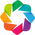

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

In [13]:
# here ... 
#import geoviews as gv
#import geoviews.feature as gf

#from geoviews import opts
#from cartopy import crs

#gv.extension('bokeh', 'matplotlib')
#df2 = pd.DataFrame({ 'radar_name': ["boulder"], 'Latitude' : [40.014984], 'Longitude' : [-105.270546] } )
#df2.hvplot.points('Longitude', 'Latitude', geo=True, 
#                 tiles=True, color='red', alpha=0.2,
#                 )

In [42]:
#import xarray as xr
#import holoviews as hv
#import hvplot.xarray
#locs = ["KTYX", "KLGX"]
#data = [[-75.68, 43.75582], [-124.10663, 47.11689]]
#times = [1,2]
#foo = xr.DataArray(data, coords=[times, locs], dims=["lat", "lon"])
#foo



<xarray.DataArray (lat: 2, lon: 2)>
array([[ -75.68   ,   43.75582],
       [-124.10663,   47.11689]])
Coordinates:
  * lat      (lat) int64 1 2
  * lon      (lon) <U4 'KTYX' 'KLGX'

In [41]:
#foo.hvplot.points(x=loc[)

:Points   [location,rname]   (value)